# Confusion Matrix

## Setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from random import randint

%matplotlib inline

def plot_matrix(data):
    plt.figure()
    plt.matshow(data)
    plt.show()
    
def scale_data(X):
    m = np.max(X)
    return X/m

In [3]:
data = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = data.load_data()
labels = ['T-shirt/topje', 'Broek', 'Pullover', 'Jurk', 'Jas', 'Sandalen', 'Shirt', 'Sneaker', 'Tas', 'Lage laars'] 
print ("Done.")

Done.


In [4]:
print ("Format train_images: {}".format(train_images.shape))
print ("Format train_labels: {}".format(train_labels.shape))
print ("Format test_images: {}".format(test_images.shape))
print ("Format test_labels: {}".format(test_labels.shape))
print ("Size labels: {}".format(len(labels)))

Formaat van de train_images: (60000, 28, 28)
Formaat van de train_labels: (60000,)
Formaat van de test_images: (10000, 28, 28)
Formaat van de test_labels: (10000,)
Grootte van de labels: 10


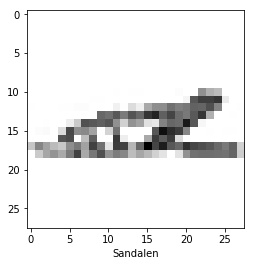

In [19]:
def plot_image(img, label):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.show()

rnd = randint(0, train_images.shape[0])
hyp = labels[train_labels[rnd]]
plot_image(train_images[rnd], hyp)

In [6]:
train_images = scale_data(train_images)
test_images = scale_data(test_images)

In [7]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(len(labels), activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_images, train_labels, epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4950 - accuracy: 0.8259
Epoch 2/6
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3714 - accuracy: 0.8663
Epoch 3/6
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3347 - accuracy: 0.8781
Epoch 4/6
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3114 - accuracy: 0.8866
Epoch 5/6
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2951 - accuracy: 0.8912
Epoch 6/6
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2793 - accuracy: 0.8972


## de confusion matrix

<class 'numpy.ndarray'>


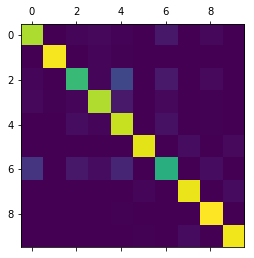

In [10]:
def conf_matrix(labels, pred):
    # Retourneer de econfusion matrix op basis van de gegeven voorspelling (pred) en de actuele
    # waarden (labels). 
    # Check eventueel de documentatie van tf.math.confusion_matrix:
    # https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
    
    return tf.math.confusion_matrix(labels, pred)    

pred = np.argmax(model.predict(test_images), axis=1)
data = np.array(conf_matrix(test_labels, pred))
print(type(data))
plot_matrix(data)

In [16]:
print(data)
TP = np.diagonal(data)
print (np.sum(data, axis=0))

FP = np.sum(data, axis=0) - TP
FN = np.sum(data, axis=1) - TP
print (np.sum(data, axis=1))
TN = data.sum() - TP - FP - FN

print (TN)



[[865   1  18  22   8   1  65   0  20   0]
 [  3 970   0  18   4   0   2   0   3   0]
 [ 16   1 669  12 208   0  69   0  25   0]
 [ 21   5  12 869  66   0  21   0   6   0]
 [  1   0  31  16 903   0  44   0   5   0]
 [  0   0   0   0   0 943   0  31   0  26]
 [152   1  62  33 101   0 617   0  34   0]
 [  0   0   0   0   0  14   0 956   0  30]
 [  3   0   0   1   7   1   0   3 985   0]
 [  0   0   0   0   0   5   1  29   0 965]]
[1061  978  792  971 1297  964  819 1019 1078 1021]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
[8804 8992 8877 8898 8606 8979 8798 8937 8907 8944]


##  TP, TN, FP, FN

<p style="text-align:center">$\text{tp}_{i} = c_{ii}$</p>
<p style="text-align:center">$\text{fp}_{i} = \sum_{l=1}^n c_{li} - \text{tp}_{i}$</p>
<p style="text-align:center">$\text{fn}_{i} = \sum_{l=1}^n c_{il} - \text{tp}_{i}$<br/></p>
<p style="text-align:center">$\text{tn}_{i} = \sum_{l=1}^n \sum_{k=1}^n c_{lk} - \text{tp}_{i} - \text{fp}_{i} - \text{fn}_{i}$</p>


In [26]:
def conf_els(conf, labels): 
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.diagonal.html
    tot = conf.sum().sum()
    cols = conf.sum(axis=0)
    rows = conf.sum(axis=1)

    tp = conf.diagonal()
    fp = cols-tp
    fn = rows-tp
    tn = tot - tp - fp - fn
    
    res = list(zip(labels,tp,fp,fn,tn))
    return res



conf_els(data,labels)

[('T-shirt/topje', 879, 227, 121, 8773),
 ('Broek', 974, 30, 26, 8970),
 ('Pullover', 717, 146, 283, 8854),
 ('Jurk', 870, 88, 130, 8912),
 ('Jas', 881, 311, 119, 8689),
 ('Sandalen', 947, 15, 53, 8985),
 ('Shirt', 621, 228, 379, 8772),
 ('Sneaker', 982, 100, 18, 8900),
 ('Tas', 979, 47, 21, 8953),
 ('Lage laars', 937, 21, 63, 8979)]

<p style="text-align:center">$\text{sensitivity (TPR)} = \frac{tp}{tp + fn}$</p>
<p style="text-align:center">$\text{precision (PPV)} = \frac{tp}{tp + fp}$</p>
<p style="text-align:center">$\text{specificity (TNR)} = \frac{tn}{tn + fp}$</p>
<p style="text-align:center">$\text{fall-out (FPR)} = \frac{fp}{fp + tn}$</p>

In [24]:
def conf_data(metrics):

    tp = sum([foo[1] for foo in metrics])
    fp = sum([foo[2] for foo in metrics])
    fn = sum([foo[3] for foo in metrics])
    tn = sum([foo[4] for foo in metrics])

    rv = {}
    rv['tpr'] = tp / (tp+fn)
    rv['ppv'] = tp / (tp+fp)
    rv['tnr'] = tn / (tn+fp)
    rv['fpr'] = fp / (fp+tn)

    return rv

In [31]:
metrics = conf_els(data,labels)
print (metrics)
print ("Calculate Scores:")
scores = conf_data(metrics)
print (scores)

[('T-shirt/topje', 814, 157, 186, 8843), ('Broek', 962, 3, 38, 8997), ('Pullover', 819, 266, 181, 8734), ('Jurk', 889, 119, 111, 8881), ('Jas', 753, 164, 247, 8836), ('Sandalen', 955, 22, 45, 8978), ('Shirt', 677, 326, 323, 8674), ('Sneaker', 906, 39, 94, 8961), ('Tas', 981, 68, 19, 8932), ('Lage laars', 980, 100, 20, 8900)]
Bepalen van de scores:
{'tpr': 0.8736, 'ppv': 0.8736, 'tnr': 0.9859555555555556, 'fpr': 0.014044444444444444}
